In [1]:
import xarray as xr
from matplotlib import pyplot as plt
import matplotlib.pylab as pl
import matplotlib as mpl
from cartopy import crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import numpy as np
import warnings as wn
%reload_ext autoreload
%autoreload 2
import esm2m.myfunctions as func

In [2]:
rootdir = '/local/ss23/GFDL_LEs/'
experiment = 'OCN/METABOLIC_INDEX/RCP85'
filename = 'MI_hitemp_sens_k01_ens*_1x1_1950_2100.nc'
path = rootdir+experiment+'/'+filename
z0_all = xr.open_mfdataset(path, engine='netcdf4', concat_dim='ensemble', combine='nested')
z0_avg = z0_all.sel(ensemble=30)
z0_all = z0_all.sel(ensemble=slice(0,30))

# Percent Ocean Plots

In [3]:
def find_p(ds, mi, total):
    red = ~np.isnan(ds.where(ds['MI'] < mi))
    s = red['MI'].sum(dim='xt_ocean').sum(dim='yt_ocean')
    perc = (s/total)*100
    p = perc.mean(dim='ensemble')
    return p

In [4]:
def percent(ds, ax, title):
    n = 12
    colors = pl.cm.viridis(np.linspace(0,1,n))
    years = np.arange(2010, 2110, 10)
    i = 0
    wn.filterwarnings('ignore')
    for year in years:
        ds_year = ds.sel(time=slice(str(year)+'-01-01',str(year)+'-12-31'))
        ax.plot(ds_year,color=colors[i],label=str(year))
        i += 1
    ax.set_title(title)
    ax.set_xlabel('months')
    ax.set_ylabel('percent of ocean')
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[::-1], labels[::-1])

In [5]:
total = 43210
totalS = 22744
totalN = 20466

In [16]:
redS = find_p(z0_divideAll.sel(yt_ocean=slice(-89.5,0)), 1.0, totalS)
redN = find_p(z0_divideAll.sel(yt_ocean=slice(0,89.5)), 1.0, totalN)
orS = find_p(z0_divideAll.sel(yt_ocean=slice(-89.5,0)), 2.0, totalS)
orN = find_p(z0_divideAll.sel(yt_ocean=slice(0,89.5)), 2.0, totalN)
yelS = find_p(z0_divideAll.sel(yt_ocean=slice(-89.5,0)), 3.0, totalS)
yelN = find_p(z0_divideAll.sel(yt_ocean=slice(0,89.5)), 3.0, totalN)

### Z=0m

(10.0, 55.0)

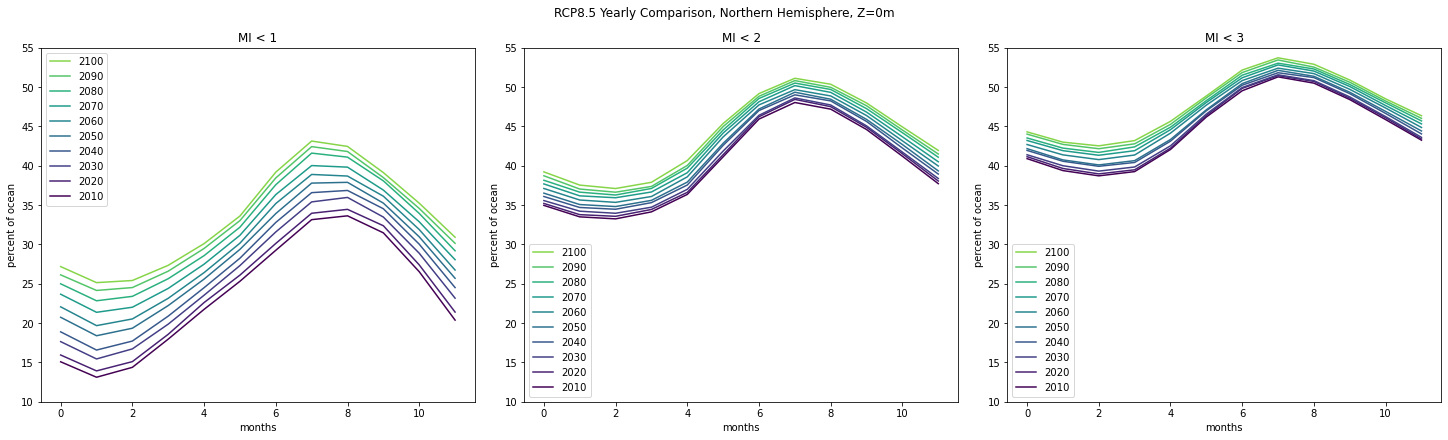

In [23]:
fig, (ax0,ax1,ax2) = plt.subplots(figsize=(20,6),ncols=3,constrained_layout=True)
fig.suptitle('RCP8.5 Yearly Comparison, Northern Hemisphere, Z=0m')
percent(redN, ax0, 'MI < 1')
ax0.set_ylim(10,55)
percent(orN, ax1, 'MI < 2')
ax1.set_ylim(10,55)
percent(yelN, ax2, 'MI < 3')
ax2.set_ylim(10,55)

In [19]:
fig, (ax0,ax1,ax2) = plt.subplots(figsize=(20,6),ncols=3,constrained_layout=True)
fig.suptitle('RCP8.5 Yearly Comparison, Northern Hemisphere, Z=0m')
percent(redN, ax0, 'MI < 1')
percent(orN, ax1, 'MI < 2')
percent(yelN, ax2, 'MI < 3')

In [24]:
fig, (ax0,ax1,ax2) = plt.subplots(figsize=(20,6),ncols=3,constrained_layout=True)
fig.suptitle('RCP8.5 Yearly Comparison, Southern Hemisphere, Z=0m')
percent(redS, ax0, 'MI < 1')
ax0.set_ylim(8,58)
percent(orS, ax1, 'MI < 2')
ax1.set_ylim(8,58)
percent(yelS, ax2, 'MI < 3')
ax2.set_ylim(8,58)

(8.0, 58.0)

In [22]:
fig, (ax0,ax1,ax2) = plt.subplots(figsize=(20,6),ncols=3,constrained_layout=True)
fig.suptitle('RCP8.5 Yearly Comparison, Southern Hemisphere, Z=0m')
percent(redS, ax0, 'MI < 1')
percent(orS, ax1, 'MI < 2')
percent(yelS, ax2, 'MI < 3')

### Z=100m

In [8]:
k11redS = find_p(k11_divideAll.sel(yt_ocean=slice(-89.5,0)), 1.0, totalS)
k11redN = find_p(k11_divideAll.sel(yt_ocean=slice(0,89.5)), 1.0, totalN)
k11orS = find_p(k11_divideAll.sel(yt_ocean=slice(-89.5,0)), 2.0, totalS)
k11orN = find_p(k11_divideAll.sel(yt_ocean=slice(0,89.5)), 2.0, totalN)
k11yelS = find_p(k11_divideAll.sel(yt_ocean=slice(-89.5,0)), 3.0, totalS)
k11yelN = find_p(k11_divideAll.sel(yt_ocean=slice(0,89.5)), 3.0, totalN)

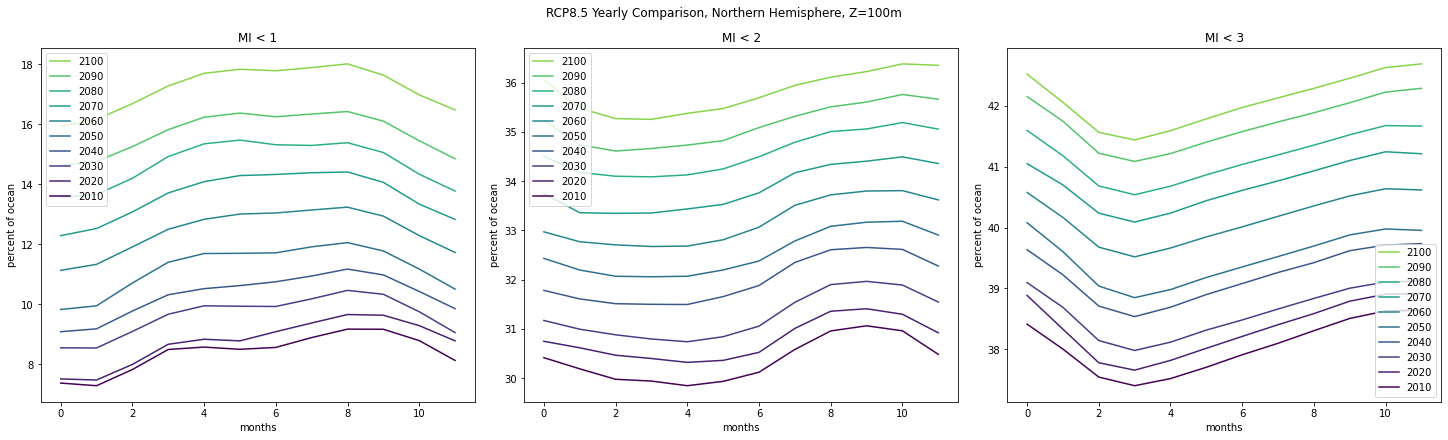

In [9]:
fig, (ax0,ax1,ax2) = plt.subplots(figsize=(20,6),ncols=3,constrained_layout=True)
fig.suptitle('RCP8.5 Yearly Comparison, Northern Hemisphere, Z=100m')
percent(k11redN, ax0, 'MI < 1')
percent(k11orN, ax1, 'MI < 2')
percent(k11yelN, ax2, 'MI < 3')

In [4]:
filename = 'MI_hitemp_sens_k11_ens*_1x1_1950_2100.nc'
path = rootdir+experiment+'/'+filename
k11_all = xr.open_mfdataset(path, engine='netcdf4', concat_dim='ensemble', combine='nested')
k11_avg = k11_all.sel(ensemble=30)
k11_all = k11_all.sel(ensemble=slice(0,30))

In [5]:
z0_divide = z0_avg/2
k11_divide = k11_avg/2
z0_divideAll = z0_all/2
k11_divideAll = k11_all/2
total = 43210
totalS = 22744
totalN = 20466

# Spatial Maps

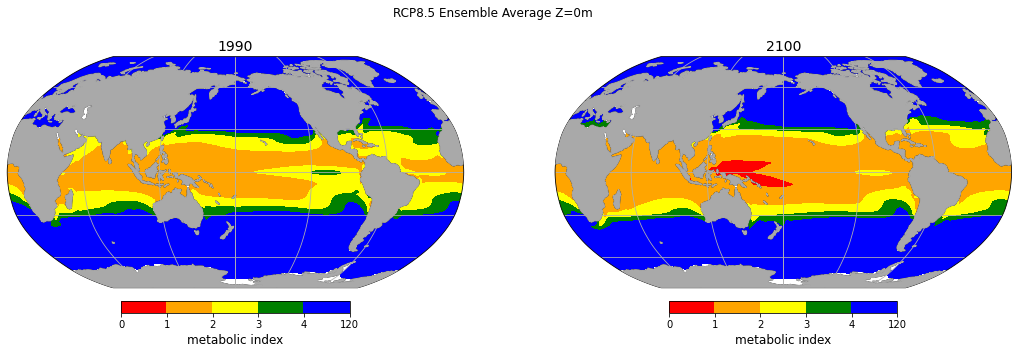

In [16]:
fig, (ax0,ax1) = plt.subplots(figsize=(18,5),nrows=1,ncols=2, subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig.suptitle('RCP8.5 Ensemble Average Z=0m')
wn.filterwarnings('ignore')
func.graph(z0_avg, ax0, '1990', 1990, None, False)
func.graph(z0_avg, ax1, '2100', 2100, None, False)

In [76]:
fig, (ax0,ax1) = plt.subplots(figsize=(18,5),nrows=1,ncols=2, subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig.suptitle('RCP8.5 Ensemble Average Z=0m')
wn.filterwarnings('ignore')
func.graph(z0_divide, ax0, '1990', 1990, None, False)
func.graph(z0_divide, ax1, '2100', 2100, None, False)

In [6]:
func.months_of_year(z0_divide, '1990', 'RCP8.5 1990, Z=0m')

<xarray.DataArray 'MI' (yt_ocean: 180, xt_ocean: 360)>
dask.array<getitem, shape=(180, 360), dtype=float32, chunksize=(180, 360), chunktype=numpy.ndarray>
Coordinates:
    time      object 1990-01-16 12:00:00
  * xt_ocean  (xt_ocean) float64 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * yt_ocean  (yt_ocean) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    st_ocean  float64 5.0
<xarray.DataArray 'MI' (yt_ocean: 180, xt_ocean: 360)>
dask.array<getitem, shape=(180, 360), dtype=float32, chunksize=(180, 360), chunktype=numpy.ndarray>
Coordinates:
    time      object 1990-02-15 00:00:00
  * xt_ocean  (xt_ocean) float64 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * yt_ocean  (yt_ocean) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    st_ocean  float64 5.0
<xarray.DataArray 'MI' (yt_ocean: 180, xt_ocean: 360)>
dask.array<getitem, shape=(180, 360), dtype=float32, chunksize=(180, 360), chunktype=numpy.ndarray>
Coordinates:
    time      object 1990-03-16 12:00:00
  * xt_

ValueError: no ISO-8601 match for string: 199012-16

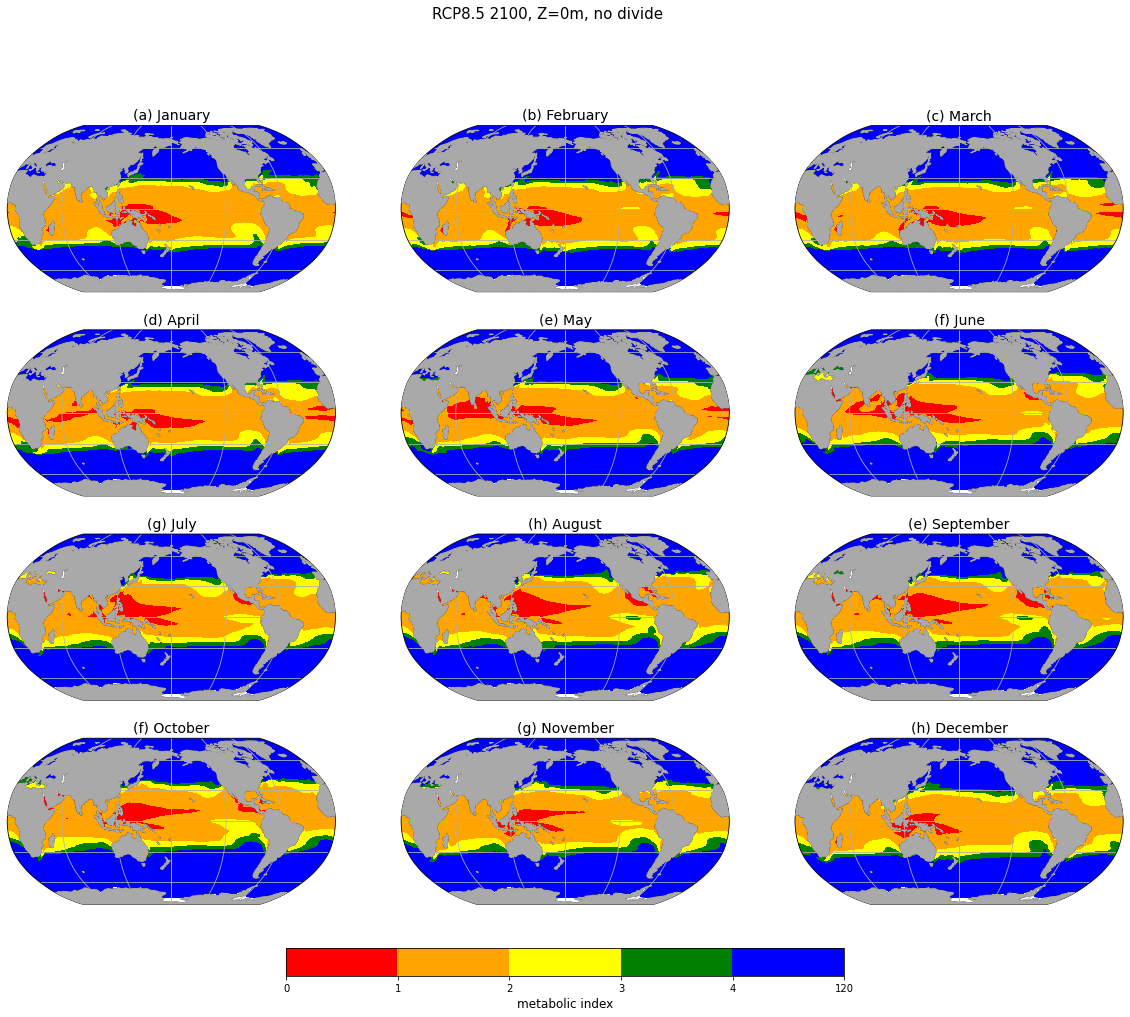

In [67]:
func.months_of_year(z0_avg, '2100', 'RCP8.5 2100, Z=0m, no divide')

In [77]:
func.months_of_year(z0_divide, '2100', 'RCP8.5 2100, Z=0m')

In [20]:
fig, (ax0,ax1) = plt.subplots(figsize=(18,5),nrows=1,ncols=2, subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig.suptitle('RCP8.5 Ensemble Average Z=100m')
wn.filterwarnings('ignore')
func.graph(k11_avg, ax0, '1990', 1990, None, False)
func.graph(k11_avg, ax1, '2100', 2100, None, False)

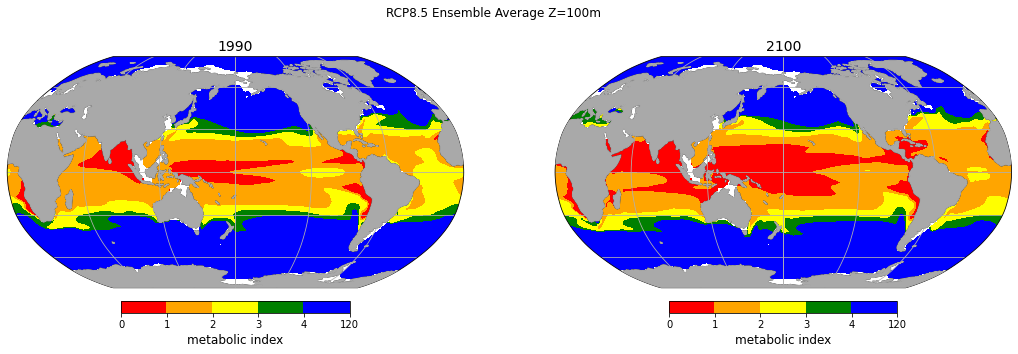

In [21]:
fig, (ax0,ax1) = plt.subplots(figsize=(18,5),nrows=1,ncols=2, subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig.suptitle('RCP8.5 Ensemble Average Z=100m')
wn.filterwarnings('ignore')
func.graph(k11_divide, ax0, '1990', 1990, None, False)
func.graph(k11_divide, ax1, '2100', 2100, None, False)

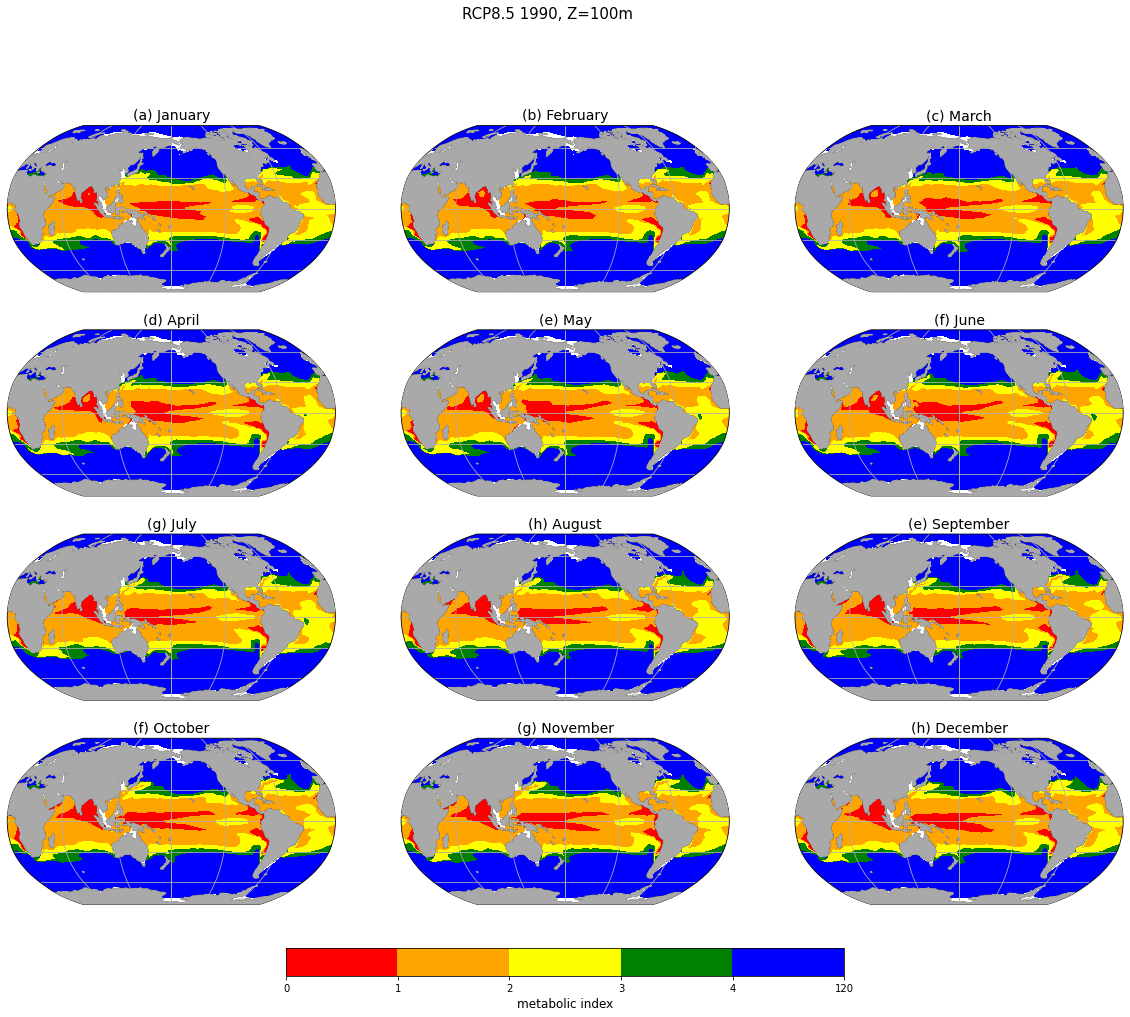

In [43]:
func.months_of_year(k11_divide, '1990', 'RCP8.5 1990, Z=100m')

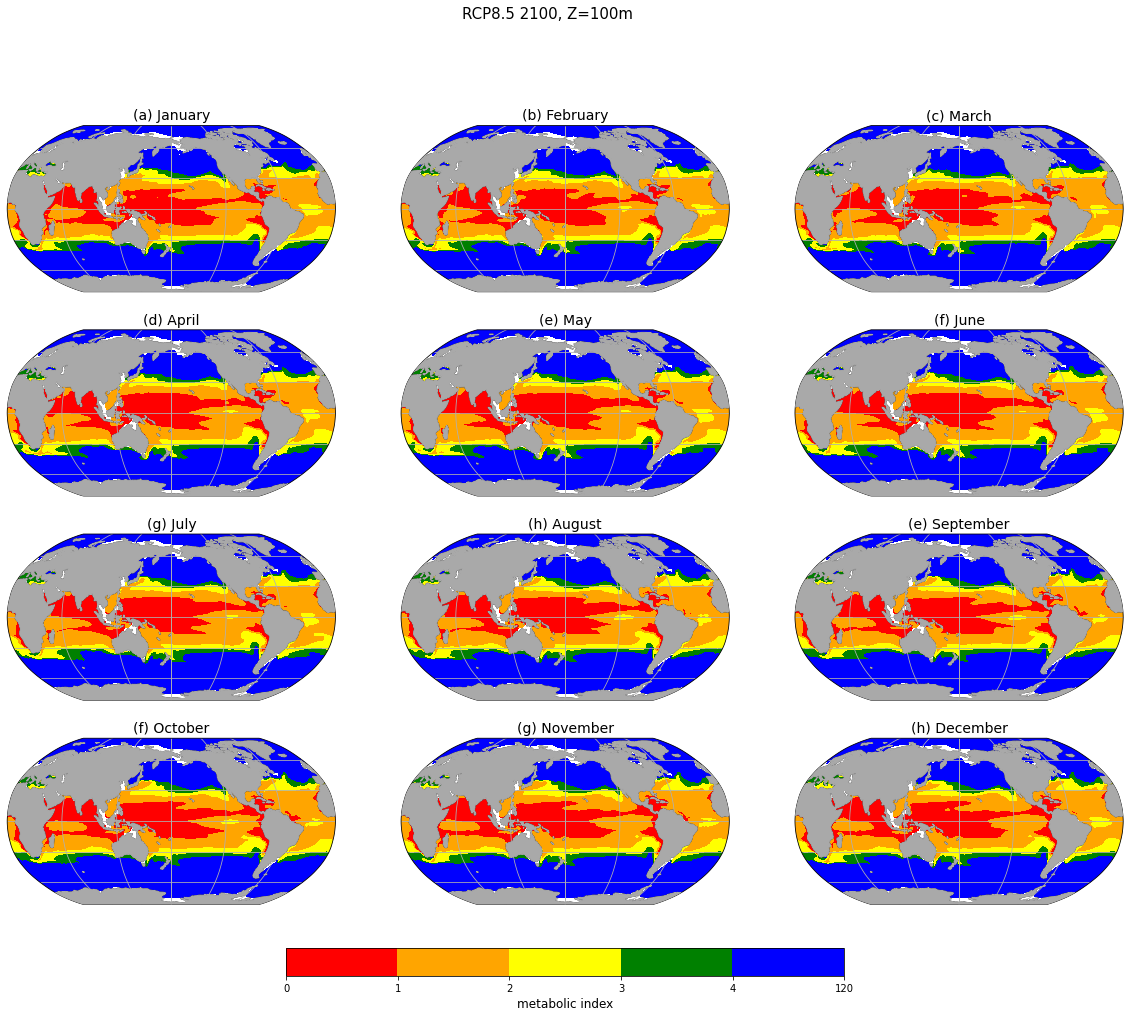

In [46]:
func.months_of_year(k11_divide, '2100', 'RCP8.5 2100, Z=100m')

In [5]:
z0_red = func.get_red(z0_divideAll, total).sel(time=slice('1990-01-16','2100-12-16'))
z0_or = func.get_orange(z0_divideAll, total).sel(time=slice('1990-01-16','2100-12-16'))
z0_yel = func.get_yellow(z0_divideAll, total).sel(time=slice('1990-01-16','2100-12-16'))

k11_red = func.get_red(k11_divideAll, total).sel(time=slice('1990-01-16','2100-12-16'))
k11_or = func.get_orange(k11_divideAll, total).sel(time=slice('1990-01-16','2100-12-16'))
k11_yel = func.get_yellow(k11_divideAll, total).sel(time=slice('1990-01-16','2100-12-16'))

In [6]:
def get_percent(ds, mi):
    ds_mi = ~np.isnan(ds.where(ds['MI']<mi))
    ds_miSum = ds_mi['MI'].sum(dim='xt_ocean').sum(dim='yt_ocean')
    ds_miPercent = (ds_miSum/total)*100
    return ds_miPercent

In [7]:
z0_allRed = get_percent(z0_divideAll, 1.0)
z0_allOr = get_percent(z0_divideAll, 2.0)
z0_allYel = get_percent(z0_divideAll, 3.0)

k11_allRed = get_percent(k11_divideAll, 1.0)
k11_allOr = get_percent(k11_divideAll, 2.0)
k11_allYel = get_percent(k11_divideAll, 3.0)

Text(0.5, 0, 'Year')

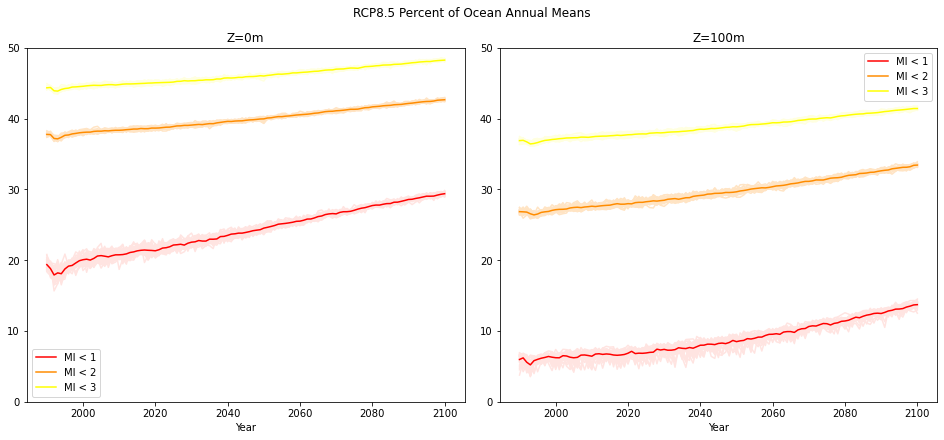

In [42]:
fig, (ax0,ax1) = plt.subplots(figsize=(13,6),ncols=2,constrained_layout=True)
fig.suptitle('RCP8.5 Percent of Ocean Annual Means')
wn.filterwarnings('ignore')

func.plot_allEns(z0_allRed.sel(time=slice('1990-01-16','2100-12-16')), ax0, 'mistyrose')
func.plot_allEns(z0_allOr.sel(time=slice('1990-01-16','2100-12-16')), ax0, 'bisque')
func.plot_allEns(z0_allYel.sel(time=slice('1990-01-16','2100-12-16')), ax0, 'lightyellow')
ax0.plot(np.unique(z0_red['time.year']),z0_red.groupby('time.year').mean(),color='red',label='MI < 1')
ax0.plot(np.unique(z0_or['time.year']),z0_or.groupby('time.year').mean(),color='darkorange',label='MI < 2')
ax0.plot(np.unique(z0_yel['time.year']),z0_yel.groupby('time.year').mean(),color='yellow',label='MI < 3')
ax0.set_title('Z=0m')
ax0.legend()
ax0.set_ylim(0,50)
ax0.set_xlabel('Year')

# func.percent_plot(ds_k11Avg, ax2, 'Depth k11', True, True, True, None, None, None,total)
func.plot_allEns(k11_allRed.sel(time=slice('1990-01-16','2100-12-16')), ax1, 'mistyrose')
func.plot_allEns(k11_allOr.sel(time=slice('1990-01-16','2100-12-16')), ax1, 'bisque')
func.plot_allEns(k11_allYel.sel(time=slice('1990-01-16','2100-12-16')), ax1, 'lightyellow')
ax1.plot(np.unique(k11_red['time.year']),k11_red.groupby('time.year').mean(),color='red',label='MI < 1')
ax1.plot(np.unique(k11_or['time.year']),k11_or.groupby('time.year').mean(),color='darkorange',label='MI < 2')
ax1.plot(np.unique(k11_yel['time.year']),k11_yel.groupby('time.year').mean(),color='yellow',label='MI < 3')
ax1.set_title('Z=100m')
ax1.legend()
ax1.set_ylim(0,50)
ax1.set_xlabel('Year')

In [45]:
fig, (ax0,ax1) = plt.subplots(figsize=(13,6),ncols=2,constrained_layout=True)
fig.suptitle('RCP8.5 Percent of Ocean Annual Means')
wn.filterwarnings('ignore')

func.plot_allEns(z0_allRed.sel(time=slice('1990-01-16','2100-12-16')), ax0, 'lightcyan')
func.plot_allEns(z0_allOr.sel(time=slice('1990-01-16','2100-12-16')), ax0, 'whitesmoke')
func.plot_allEns(z0_allYel.sel(time=slice('1990-01-16','2100-12-16')), ax0, 'lavender')
ax0.plot(np.unique(z0_red['time.year']),z0_red.groupby('time.year').mean(),color='tab:cyan',label='MI < 1')
ax0.plot(np.unique(z0_or['time.year']),z0_or.groupby('time.year').mean(),color='tab:gray',label='MI < 2')
ax0.plot(np.unique(z0_yel['time.year']),z0_yel.groupby('time.year').mean(),color='tab:purple',label='MI < 3')
ax0.set_title('Z=0m')
ax0.legend()
ax0.set_ylim(0,50)
ax0.set_xlabel('Year')

# func.percent_plot(ds_k11Avg, ax2, 'Depth k11', True, True, True, None, None, None,total)
func.plot_allEns(k11_allRed.sel(time=slice('1990-01-16','2100-12-16')), ax1, 'lightcyan')
func.plot_allEns(k11_allOr.sel(time=slice('1990-01-16','2100-12-16')), ax1, 'whitesmoke')
func.plot_allEns(k11_allYel.sel(time=slice('1990-01-16','2100-12-16')), ax1, 'lavender')
ax1.plot(np.unique(k11_red['time.year']),k11_red.groupby('time.year').mean(),color='tab:cyan',label='MI < 1')
ax1.plot(np.unique(k11_or['time.year']),k11_or.groupby('time.year').mean(),color='tab:gray',label='MI < 2')
ax1.plot(np.unique(k11_yel['time.year']),k11_yel.groupby('time.year').mean(),color='tab:purple',label='MI < 3')
ax1.set_title('Z=100m')
ax1.legend()
ax1.set_ylim(0,50)
ax1.set_xlabel('Year')

Text(0.5, 0, 'Year')

# Number of Months Below Threshold

In [8]:
def ds_month(ds, thresh):
    mi = ds.squeeze()
    mi_thresh = ~np.isnan(mi.where(mi['MI']<thresh))
    mi_month = mi_thresh.groupby('time.year').sum(dim='time')
    mi_mean = mi_month.mean(dim='ensemble')
    return mi_mean

In [17]:
z0_red = ds_month(z0_divideAll, 1.0)
z0_or = ds_month(z0_divideAll, 2.0)
z0_yel = ds_month(z0_divideAll, 3.0)
z0_gr = ds_month(z0_divideAll, 4.0)

k11_red = ds_month(k11_divideAll, 1.0)
k11_or = ds_month(k11_divideAll, 2.0)
k11_yel = ds_month(k11_divideAll, 3.0)
k11_gr = ds_month(k11_divideAll, 4.0)

In [14]:
def map_months(plot, ds, cmap, title, year):
    ds_sum = ds.sel(year=year)
    wn.filterwarnings('ignore')
    months = [0,1,2,3,4,5,6,7,8,9,10,11,12]
    bounds = np.arange(1,13,1)
    crs = ccrs.PlateCarree()
    X = ds_sum['xt_ocean']
    Y = ds_sum['yt_ocean']
    Z = ds_sum['MI'].squeeze()
    Z, X = add_cyclic_point(Z,coord=X)
    im = plot.contourf(X,Y,Z,months,cmap=cmap,transform=crs,extend='min')
    
    # Add a land mask to your plot, as well as grid lines and coastlines
    plot.add_feature(cfeature.LAND,zorder=10,facecolor='darkgray')
    plot.gridlines()
    plot.coastlines()
    plot.set_title(title,fontsize=14,loc='center')
    # im.cmap.set_under('lightcyan')  
    # im.set_clim(0, 1) 
    return im

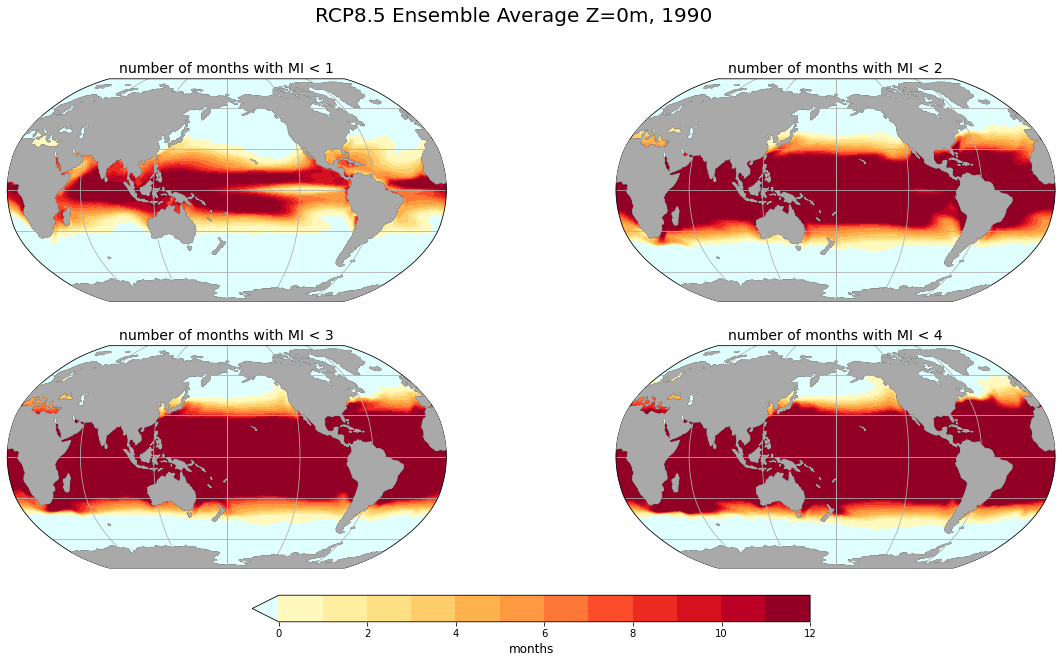

In [15]:
fig,axs = plt.subplots(figsize=(20,10),nrows=2,ncols=2,subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig.suptitle('RCP8.5 Ensemble Average Z=0m, 1990',fontsize=20)
map_months(axs[0,0], z0_red, 'YlOrRd', 'number of months with MI < 1', 1990)
map_months(axs[0,1], z0_or, 'YlOrRd', 'number of months with MI < 2', 1990)
map_months(axs[1,0], z0_yel, 'YlOrRd', 'number of months with MI < 3', 1990)
im = map_months(axs[1,1], z0_gr, 'YlOrRd', 'number of months with MI < 4', 1990)
cbar = plt.colorbar(im,ax=axs,orientation='horizontal',fraction=0.05,pad=0.05,shrink=0.5)
cbar.set_label('months',fontsize=12)

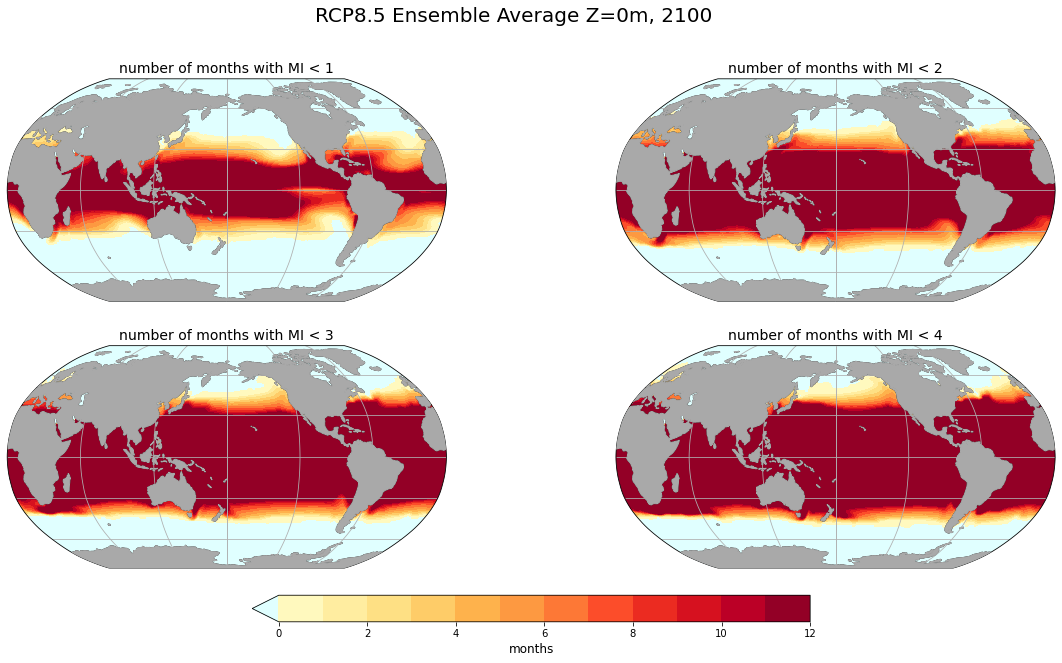

In [16]:
fig,axs = plt.subplots(figsize=(20,10),nrows=2,ncols=2,subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig.suptitle('RCP8.5 Ensemble Average Z=0m, 2100',fontsize=20)
map_months(axs[0,0], z0_red, 'YlOrRd', 'number of months with MI < 1', 2100)
map_months(axs[0,1], z0_or, 'YlOrRd', 'number of months with MI < 2', 2100)
map_months(axs[1,0], z0_yel, 'YlOrRd', 'number of months with MI < 3', 2100)
im = map_months(axs[1,1], z0_gr, 'YlOrRd', 'number of months with MI < 4', 2100)
cbar = plt.colorbar(im,ax=axs,orientation='horizontal',fraction=0.05,pad=0.05,shrink=0.5)
cbar.set_label('months',fontsize=12)

# Yearly Comparisons

In [79]:
z0_rYear = func.get_red(z0_divideAll, total)
z0_oYear = func.get_orange(z0_divideAll, total)
z0_yYear = func.get_yellow(z0_divideAll, total)
z0_rS = func.get_red(z0_divideAll, totalS)
z0_rN = func.get_red(z0_divideAll, totalN)
z0_oS = func.get_orange(z0_divideAll, totalS)
z0_oN = func.get_orange(z0_divideAll, totalN)
z0_yS = func.get_yellow(z0_divideAll, totalS)
z0_yN = func.get_yellow(z0_divideAll, totalN)

In [80]:
fig, ax = plt.subplots(figsize=(10,8))
# fig.suptitle('RCP8.5 Ensemble Average Yearly Comparison, Z=0m')
func.percent_by_year(z0_yN,'Percent of Ocean with MI < 1.0', ax, total)

In [91]:
k11_rYear = func.get_red(k11_divideAll, total)
k11_oYear = func.get_orange(k11_divideAll, total)
k11_yYear = func.get_yellow(k11_divideAll, total)
k11_rS = func.get_red(k11_divideAll.sel(yt_ocean=slice(-89.5,0)), totalS)
k11_rN = func.get_red(k11_divideAll.sel(yt_ocean=slice(0,89.5)), totalN)
k11_oS = func.get_orange(k11_divideAll.sel(yt_ocean=slice(-89.5,0)), totalS)
k11_oN = func.get_orange(k11_divideAll.sel(yt_ocean=slice(0,89.5)), totalN)
k11_yS = func.get_yellow(k11_divideAll.sel(yt_ocean=slice(-89.5,0)), totalS)
k11_yN = func.get_yellow(k11_divideAll.sel(yt_ocean=slice(0,89.5)), totalN)

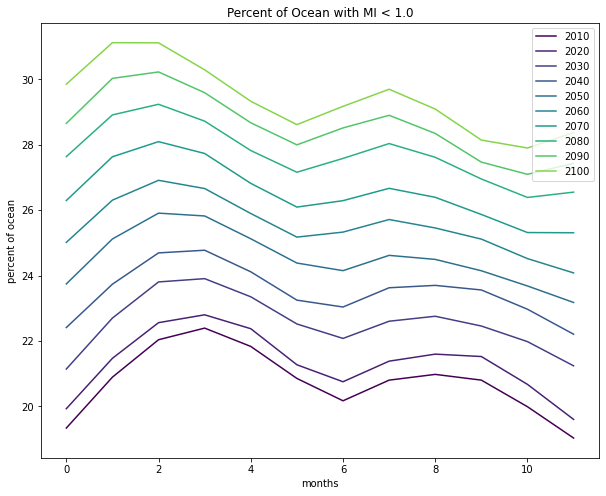

In [22]:
fig, ax = plt.subplots(figsize=(10,8))
# fig.suptitle('RCP8.5 Ensemble Average Yearly Comparison, Z=0m')
func.percent_by_year(z0_rYear,'Percent of Ocean with MI < 1.0', ax, total)

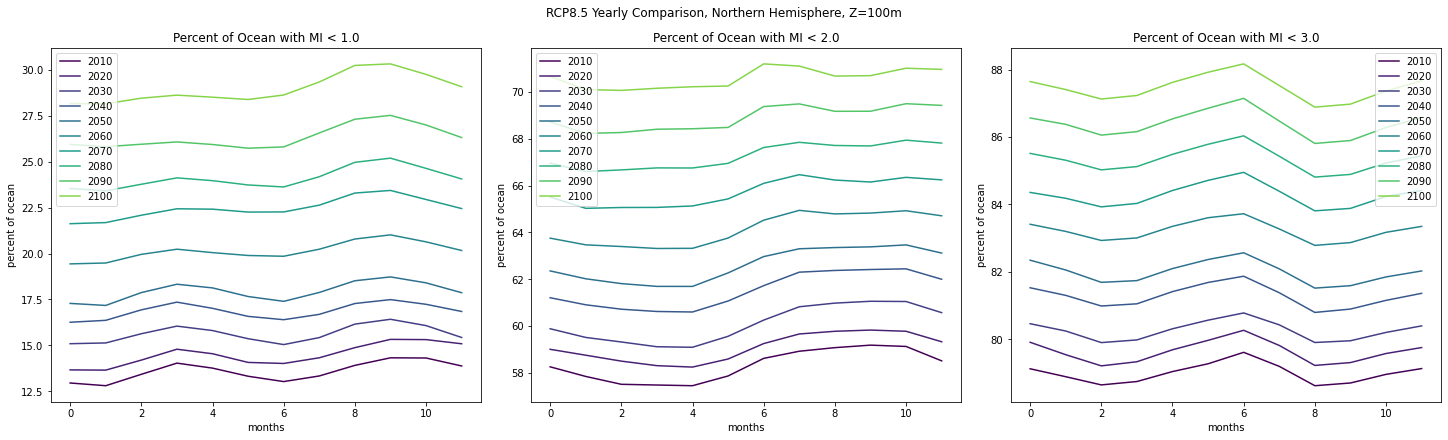

In [31]:
fig, (ax0,ax1,ax2) = plt.subplots(figsize=(20,6),ncols=3,constrained_layout=True)
fig.suptitle('RCP8.5 Yearly Comparison, Northern Hemisphere, Z=100m')
func.percent_by_year(k11_rN,'Percent of Ocean with MI < 1.0', ax0, totalN)
# ax0.set_ylim(39,106)
func.percent_by_year(k11_oN,'Percent of Ocean with MI < 2.0', ax1, totalN)
# ax1.set_ylim(39,106)
func.percent_by_year(k11_yN,'Percent of Ocean with MI < 3.0', ax2, totalN)
# ax2.set_ylim(39,106)

In [32]:
fig, (ax0,ax1,ax2) = plt.subplots(figsize=(20,6),ncols=3,constrained_layout=True)
fig.suptitle('RCP8.5 Yearly Comparison, Southern Hemisphere, Z=100m')
func.percent_by_year(k11_rS,'Percent of Ocean with MI < 1.0', ax0, totalN)
# ax0.set_ylim(34,96)
func.percent_by_year(k11_oS,'Percent of Ocean with MI < 2.0', ax1, totalN)
# ax1.set_ylim(34,96)
func.percent_by_year(k11_yS,'Percent of Ocean with MI < 3.0', ax2, totalN)
# ax2.set_ylim(34,96)

In [34]:
# Load the area data
rootdir = '/local/ss23/GFDL_LEs/'
subdir = 'AREA_FILES_ETC'
filename_area = 'WOA2001_grid.nc'
path_area = rootdir+subdir+'/'+filename_area
area = xr.open_dataset(path_area)['AREA'].rename({'latitude':'yt_ocean','longitude':'xt_ocean'})
area = area.assign_coords({'xt_ocean':z0_avg['xt_ocean'],'yt_ocean':z0_avg['yt_ocean']})

(0.9, 3.3)

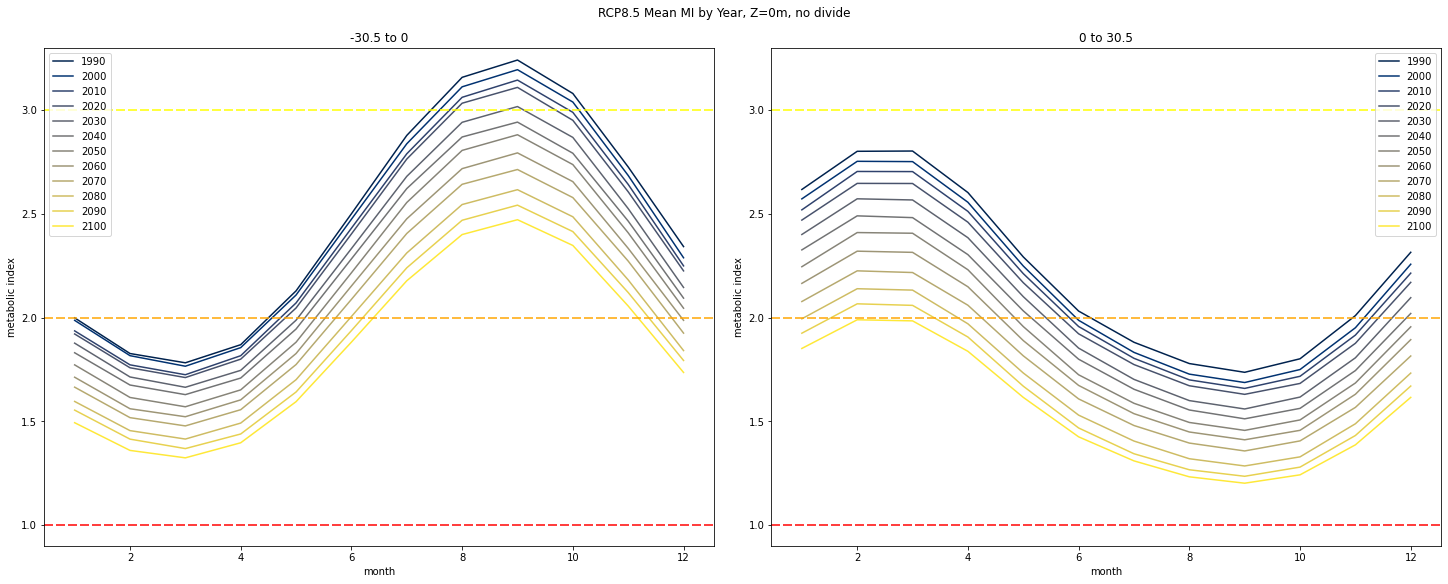

In [71]:
fig, (ax0,ax1) = plt.subplots(figsize=(20,8),ncols=2,constrained_layout=True)
fig.suptitle('RCP8.5 Mean MI by Year, Z=0m, no divide')
func.year_comp(area, z0_avg, ax0, [None, None, -30.5, 0], True, True, True, 'z0')
ax0.set_ylim(0.9,3.3)
func.year_comp(area, z0_avg, ax1, [None, None, 0, 30.5], True, True, True, 'z0')
ax1.set_ylim(0.9,3.3)

In [41]:
fig, (ax0,ax1) = plt.subplots(figsize=(20,8),ncols=2,constrained_layout=True)
fig.suptitle('RCP8.5 Mean MI by Year, Z=0m')
func.year_comp(area, z0_divide, ax0, [None, None, -30.5, 0], True, False, False, 'z0')
ax0.set_ylim(0.5,1.7)
func.year_comp(area, z0_divide, ax1, [None, None, 0, 30.5], True, False, False, 'z0')
ax1.set_ylim(0.5,1.7)

(0.5, 1.7)

(0.9, 1.9)

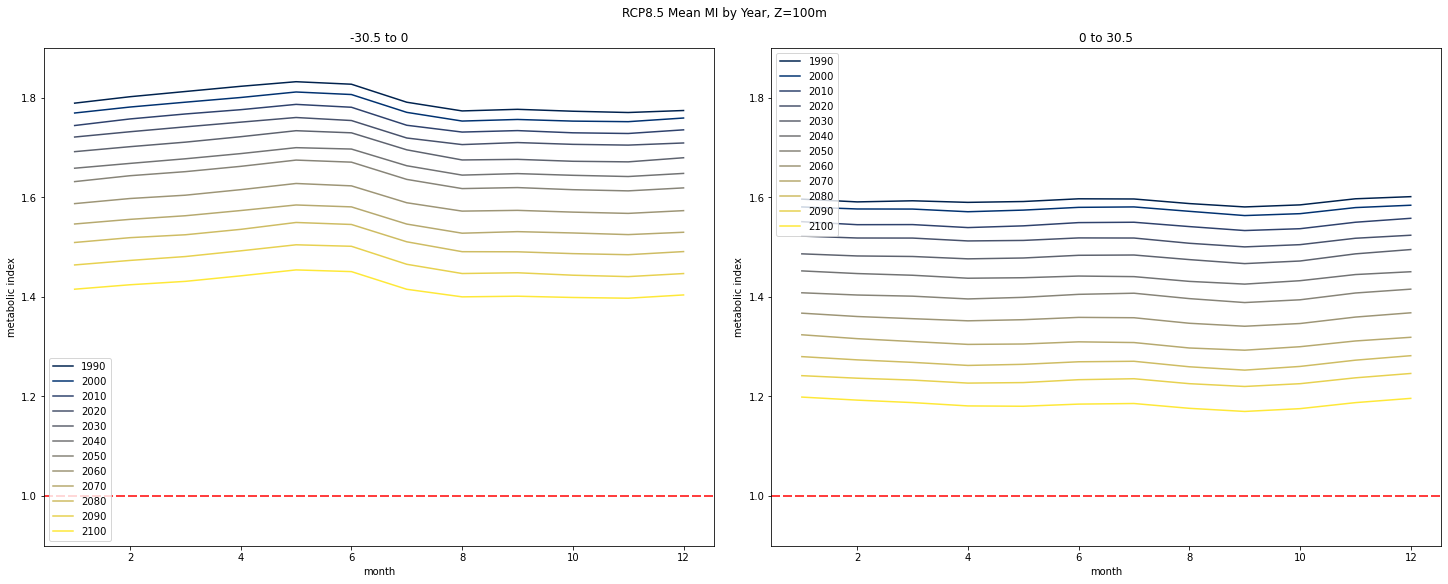

In [46]:
fig, (ax0,ax1) = plt.subplots(figsize=(20,8),ncols=2,constrained_layout=True)
fig.suptitle('RCP8.5 Mean MI by Year, Z=100m')
func.year_comp(area, k11_divide, ax0, [None, None, -30.5, 0], True, False, False, 'z0')
ax0.set_ylim(0.9,1.9)
func.year_comp(area, k11_divide, ax1, [None, None, 0, 30.5], True, False, False, 'z0')
ax1.set_ylim(0.9,1.9)

In [48]:
def percent_month(ds, month):
    byMonth = ~np.isnan(ds.where(ds['MI']>=month))
    percent_sum = byMonth['MI'].sum(dim='xt_ocean').sum(dim='yt_ocean')
    percent = (percent_sum/43210)*100
    return percent

In [54]:
z0red_1 = percent_month(z0_red.sel(year=slice(1990,2100)), 1)
z0red_3 = percent_month(z0_red.sel(year=slice(1990,2100)), 3)
z0red_6 = percent_month(z0_red.sel(year=slice(1990,2100)), 6)
z0red_9 = percent_month(z0_red.sel(year=slice(1990,2100)), 9)
z0red_12 = percent_month(z0_red.sel(year=slice(1990,2100)), 12)

In [55]:
z0or_1 = percent_month(z0_or.sel(year=slice(1990,2100)), 1)
z0or_3 = percent_month(z0_or.sel(year=slice(1990,2100)), 3)
z0or_6 = percent_month(z0_or.sel(year=slice(1990,2100)), 6)
z0or_9 = percent_month(z0_or.sel(year=slice(1990,2100)), 9)
z0or_12 = percent_month(z0_or.sel(year=slice(1990,2100)), 12)

In [56]:
z0yel_1 = percent_month(z0_yel.sel(year=slice(1990,2100)), 1)
z0yel_3 = percent_month(z0_yel.sel(year=slice(1990,2100)), 3)
z0yel_6 = percent_month(z0_yel.sel(year=slice(1990,2100)), 6)
z0yel_9 = percent_month(z0_yel.sel(year=slice(1990,2100)), 9)
z0yel_12 = percent_month(z0_yel.sel(year=slice(1990,2100)), 12)

In [57]:
fig,(ax0,ax1,ax2) = plt.subplots(figsize=(20,5),nrows=1,ncols=3)
fig.suptitle('RCP8.5 Percent Ocean')
ax0.plot(np.unique(z0red_1['year']),z0red_1,color='tab:blue',label='1 months')
ax0.plot(np.unique(z0red_3['year']),z0red_3,color='tab:purple',label='3 months')
ax0.plot(np.unique(z0red_6['year']),z0red_6,color='tab:green',label='6 months')
ax0.plot(np.unique(z0red_9['year']),z0red_9,color='tab:olive',label='9 months')
ax0.plot(np.unique(z0red_12['year']),z0red_12,color='tab:gray',label='12 months')
ax0.legend()
ax0.set_title('MI < 1')
ax0.set_ylim(0,56)
ax1.plot(np.unique(z0or_1['year']),z0or_1,color='tab:blue',label='1 months')
ax1.plot(np.unique(z0or_3['year']),z0or_3,color='tab:purple',label='3 months')
ax1.plot(np.unique(z0or_6['year']),z0or_6,color='tab:green',label='6 months')
ax1.plot(np.unique(z0or_9['year']),z0or_9,color='tab:olive',label='9 months')
ax1.plot(np.unique(z0or_12['year']),z0or_12,color='tab:gray',label='12 months')
ax1.legend()
ax1.set_title('MI < 2')
ax1.set_ylim(0,56)
ax2.plot(np.unique(z0yel_1['year']),z0yel_1,color='tab:blue',label='1 months')
ax2.plot(np.unique(z0yel_3['year']),z0yel_3,color='tab:purple',label='3 months')
ax2.plot(np.unique(z0yel_6['year']),z0yel_6,color='tab:green',label='6 months')
ax2.plot(np.unique(z0yel_9['year']),z0yel_9,color='tab:olive',label='9 months')
ax2.plot(np.unique(z0yel_12['year']),z0yel_12,color='tab:gray',label='12 months')
ax2.legend()
ax2.set_title('MI < 3')
ax2.set_ylim(0,56)

(0.0, 56.0)

# Time of Emergence

In [58]:
da_rcp85 = []
da_rcp85.append('placeholder')
for i in range(1,13):
    da_emerge = z0_red.year.where(z0_red>=i).min(dim='year')
    da_rcp85.append(da_emerge)

In [61]:
fig,ax = plt.subplots(figsize=(10,8),subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
func.map_years(da_rcp85, ax, 1, 'RCP8.5 Year of Emergence MI < 1, Z=0m')